In [17]:
import pandas as pd
import geopandas as gpd
import io

import requests

url = "https://gis-public.sandiegocounty.gov/arcgis/rest/services/Hosted/SDAPCD_Complaints/FeatureServer/0/query?where=1%3D1&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=nature_of_complaint%2C+date_received%2C+record_number%2C+record_status%2Cinvestigation_outcome%2C+response_duration__hours_%2C+x_coordinate%2C+y_coordinate%2C+cross_street___intersection&returnGeometry=true&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&gdbVersion=&historicMoment=&returnDistinctValues=false&returnIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&multipatchOption=xyFootprint&resultOffset=&resultRecordCount=&returnTrueCurves=false&returnCentroid=false&timeReferenceUnknownClient=false&sqlFormat=none&resultType=&datumTransformation=&lodType=geohash&lod=&lodSR=&f=geojson"

In [8]:

try:
    # Fetch the content from the URL using requests
    response = requests.get(url)

    # Raise an HTTPError for bad responses (4xx or 5xx status codes)
    response.raise_for_status()

    # Get the GeoJSON content as a string
    geojson_data = response.text

    # Read the GeoJSON string into a GeoDataFrame using an in-memory file-like object
    df = gpd.read_file(io.StringIO(geojson_data))

    print("Successfully loaded GeoDataFrame.")
    # Optional: Print first few rows to verify
    # print(df.head())

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from URL: {e}")
except Exception as e:
    print(f"An unexpected error occurred while processing GeoJSON data: {e}")


Successfully loaded GeoDataFrame.


In [9]:
df.columns

Index(['x_coordinate', 'nature_of_complaint', 'record_status', 'record_number',
       'investigation_outcome', 'date_received', 'response_duration__hours_',
       'cross_street___intersection', 'y_coordinate', 'geometry'],
      dtype='object')

In [10]:
# add a human readable
df['datetime']=pd.to_datetime(df['date_received'],unit='ms')

df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

df['date']

df['hour']=df['datetime'].dt.hour

df['hour'].unique()

array([7, 8], dtype=int32)

In [11]:
issue_df=df[(df['x_coordinate']==-117.081305) & (df['y_coordinate']==32.552044)]
issue_df

,x_coordinate,nature_of_complaint,record_status,record_number,investigation_outcome,date_received,response_duration__hours_,cross_street___intersection,y_coordinate,geometry,datetime,date,hour
741,-117.081305,Odor,Closed,APCD2023-CMP-0460,Outside APCD Jurisdiction,1694156400000,7.650000,Caspian Wy and N McCoy Trl,32.552044,POINT (-117.0813 32.55204),2023-09-08 07:00:00,2023-09-08,7
744,-117.081305,Odor,Closed,APCD2023-CMP-0463,Outside APCD Jurisdiction,1694242800000,0.166667,N/A,32.552044,POINT (-117.0813 32.55204),2023-09-09 07:00:00,2023-09-09,7
747,-117.081305,Odor,Closed,APCD2023-CMP-0466,Outside APCD Jurisdiction,1694242800000,0.800000,Caspian Wy and N McCoy Trl,32.552044,POINT (-117.0813 32.55204),2023-09-09 07:00:00,2023-09-09,7
1452,-117.081305,Odor,Open,APCD2024-CMP-0460,Enforcement Action Taken,1721545200000,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2024-07-21 07:00:00,2024-07-21,7
1453,-117.081305,Odor,Open,APCD2024-CMP-0460,Enforcement Action Taken,1721545200000,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2024-07-21 07:00:00,2024-07-21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,-117.081305,Odor,Closed,APCD2025-CMP-1257,None,1752649200000,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2025-07-16 07:00:00,2025-07-16,7
5882,-117.081305,Odor,Closed,APCD2025-CMP-1267,None,1752908400000,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2025-07-19 07:00:00,2025-07-19,7
5886,-117.081305,Odor,Closed,APCD2025-CMP-1272,None,1753081200000,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2025-07-21 07:00:00,2025-07-21,7
5896,-117.081305,Odor,Closed,APCD2025-CMP-1283,None,1753599600000,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2025-07-27 07:00:00,2025-07-27,7


In [12]:
issue_df['cross_street___intersection'].unique()

array(['Caspian Wy and N McCoy Trl', 'N/A',
       'Caspian Way and N McCoy Trail', '3rd St and Imperial Beach Blvd',
       'Terrace Pine Dr and Terrace Pine Ln',
       'Seacoast Dr and Imperial Beach Blvd',
       'Seacoast Dr and Citrus Ave', '9th St and Grove Ave',
       'Calla Ave and 10th St', 'Saturn Blvd and Donax Ave',
       '16th St and Halo St', 'Oneonta and Connecticut St',
       'Leon Ave and Bubbling Well Dr',
       'W San Ysidro Blvd and Via Suspiro', 'Evergreen Ave and 2nd St',
       'Hollister St and Monument Rd', 'Tijuana River Valley (US/MX)',
       'Carnation Ave and Calla Ave', 'Clearwater Way and Dairy Mart Rd',
       'Maxwell Rd and Main St', 'Caspian Way and McCoy Trail',
       'Caspian Way and N. McCoy Trail', 'Connecticut St & Hemlock Ave',
       'Oneonta Ave & Connecticut St', 'Elder Ave & 03rd St',
       'Transite Ave & Halley St', 'Caspian Way & 03rd St',
       'Caspian Wy and N McCoy Trail', 'Caspian Way and N McCoy Trai',
       'Hollister St 

In [13]:
df['cross_street___intersection'].unique()


array(['40th St and Thorn St', 'Caminito Ameca St and Via Mallorca Rd',
       'La Senda Wy and E J St', ..., 'Woodvale Dr & Mesa Rd',
       'Quarry Rd and Elkelton Pl',
       'Camino del Oro and La Jolla Shores Dr'],
      shape=(1726,), dtype=object)

In [14]:
df[df['cross_street___intersection']== 'Caspian Way and N McCoy Trail']

,x_coordinate,nature_of_complaint,record_status,record_number,investigation_outcome,date_received,response_duration__hours_,cross_street___intersection,y_coordinate,geometry,datetime,date,hour
1150,-117.126302,Odor,Closed,APCD2024-CMP-0137,None,1709366400000,NaN,Caspian Way and N McCoy Trail,32.574803,POINT (-117.1263 32.5748),2024-03-02 08:00:00,2024-03-02,8
1293,-117.126488,Odor,Closed,APCD2024-CMP-0288,Outside APCD Jurisdiction,1715324400000,2.150000,Caspian Way and N McCoy Trail,32.574795,POINT (-117.12649 32.5748),2024-05-10 07:00:00,2024-05-10,7
1452,-117.081305,Odor,Open,APCD2024-CMP-0460,Enforcement Action Taken,1721545200000,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2024-07-21 07:00:00,2024-07-21,7
1453,-117.081305,Odor,Open,APCD2024-CMP-0460,Enforcement Action Taken,1721545200000,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2024-07-21 07:00:00,2024-07-21,7
1454,-117.081305,Odor,Open,APCD2024-CMP-0460,Enforcement Action Taken,1721545200000,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2024-07-21 07:00:00,2024-07-21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,-117.081305,Odor,Closed,APCD2025-CMP-1257,None,1752649200000,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2025-07-16 07:00:00,2025-07-16,7
5882,-117.081305,Odor,Closed,APCD2025-CMP-1267,None,1752908400000,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2025-07-19 07:00:00,2025-07-19,7
5886,-117.081305,Odor,Closed,APCD2025-CMP-1272,None,1753081200000,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2025-07-21 07:00:00,2025-07-21,7
5896,-117.081305,Odor,Closed,APCD2025-CMP-1283,None,1753599600000,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2025-07-27 07:00:00,2025-07-27,7


In [18]:
df[df['cross_street___intersection']== 'Caspian Way and N McCoy Trail'].drop_duplicates(subset=['cross_street___intersection','x_coordinate','y_coordinate'])

,x_coordinate,nature_of_complaint,record_status,record_number,investigation_outcome,date_received,response_duration__hours_,cross_street___intersection,y_coordinate,geometry,datetime,date,hour
1150,-117.126302,Odor,Closed,APCD2024-CMP-0137,None,1709366400000,NaN,Caspian Way and N McCoy Trail,32.574803,POINT (-117.1263 32.5748),2024-03-02 08:00:00,2024-03-02,8
1293,-117.126488,Odor,Closed,APCD2024-CMP-0288,Outside APCD Jurisdiction,1715324400000,2.150000,Caspian Way and N McCoy Trail,32.574795,POINT (-117.12649 32.5748),2024-05-10 07:00:00,2024-05-10,7
1452,-117.081305,Odor,Open,APCD2024-CMP-0460,Enforcement Action Taken,1721545200000,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204),2024-07-21 07:00:00,2024-07-21,7
1832,-116.988490,Odor,Closed,APCD2024-CMP-0761,None,1722841200000,NaN,Caspian Way and N McCoy Trail,32.645264,POINT (-116.98849 32.64526),2024-08-05 07:00:00,2024-08-05,7
1994,-117.055443,Odor,Closed,APCD2024-CMP-0929,None,1723100400000,NaN,Caspian Way and N McCoy Trail,32.584619,POINT (-117.05544 32.58462),2024-08-08 07:00:00,2024-08-08,7
2032,-117.132239,Odor,Closed,APCD2024-CMP-0971,None,1723186800000,NaN,Caspian Way and N McCoy Trail,32.571326,POINT (-117.13224 32.57133),2024-08-09 07:00:00,2024-08-09,7
2160,-117.087525,Odor,Closed,APCD2024-CMP-1112,None,1723446000000,NaN,Caspian Way and N McCoy Trail,32.575632,POINT (-117.08752 32.57563),2024-08-12 07:00:00,2024-08-12,7
2294,-117.016541,Odor,Closed,APCD2024-CMP-1256,None,1723618800000,NaN,Caspian Way and N McCoy Trail,32.601753,POINT (-117.01654 32.60175),2024-08-14 07:00:00,2024-08-14,7
2723,-117.084342,Odor,Closed,APCD2024-CMP-1769,None,1724655600000,NaN,Caspian Way and N McCoy Trail,32.544780,POINT (-117.08434 32.54478),2024-08-26 07:00:00,2024-08-26,7
2997,-117.065634,Odor,Closed,APCD2024-CMP-2080,None,1725346800000,NaN,Caspian Way and N McCoy Trail,32.543820,POINT (-117.06563 32.54382),2024-09-03 07:00:00,2024-09-03,7


<Axes: >

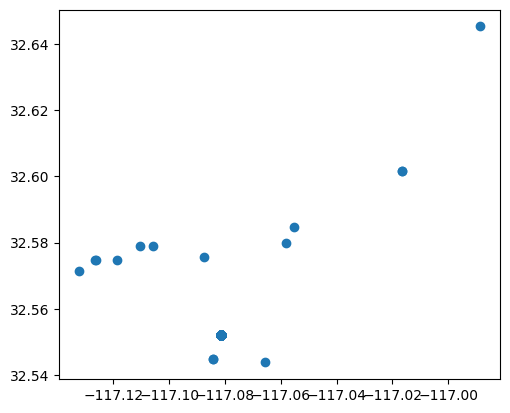

In [19]:
df[df['cross_street___intersection']== 'Caspian Way and N McCoy Trail'].plot()